<a href="https://colab.research.google.com/github/tousif99/Bike_Sharing_Demand_Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Bike Sharing Demand Prediction**



##### **Project Type**    - Regression
Contribution - Team

**Team Member 1** - Tousif Sheikh

**Team Member 2** - Mohammad Sufawan

**Team Member 3** - Udit kumar


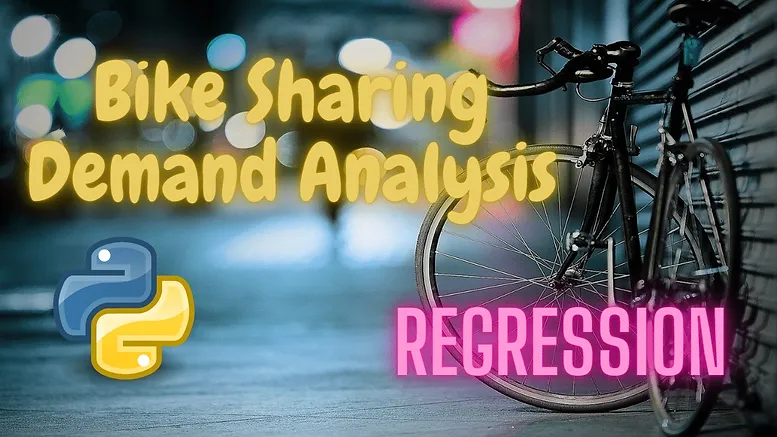

# **GitHub Link -**

Tousif Sheikh- https://github.com/tousif99/Bike_Sharing_Demand_Prediction/tree/main

Mohammad Sufawan-https://github.com/sufawan20/Bike-Sharing-Demand-Prediction-Regression-project/blob/main/Bike_Sharing_Demand_Prediction.ipynb

# **Project Summary -**

This project aims to enhance the mobility and convenience of the public through bike-sharing programs in metropolitan areas. One of the main challenges is maintaining a consistent supply of bikes for rental. Bike-sharing systems are automated and enable people to rent and return bikes at various locations. The project focuses on utilizing historical data on factors such as temperature and time to predict the demand for the bike-sharing program in Seoul.

* There were approximately 8760 records and 14 attributes in the dataset.
* We started by importing the dataset, and necessary libraries and conducted exploratory data analysis (EDA).
* Outliers and null values were removed from the raw data and treated. Data were transformed to ensure that it was compatible with machine learning models.
* We handled target class imbalance using square root normalization.
* Then finally cleaned and scaled data was sent to 11 various models, the metrics were made to evaluate the model, and we tuned the hyperparameters to make sure the right parameters were being passed to the model.
* When developing a machine learning model, it is generally recommended to track multiple metrics because each one highlights distinct aspects of model performance. We are, focusing more on the R2 score and RMSE score.
*  The R2 score is scale-independent, which means that it can be used to compare models that are fit to different target variables or to target variables that have different units of measurement. This is particularly useful when comparing models for different problems, as it allows for a direct comparison of the performance of the models, regardless of the scale of the target variable

# **Index**

1.   Problem Statement
2.   Know Your Data
3.   Understanding Your Variables
4.   EDA
5.   Data Cleaning
6.   Feature Engineering
7.   Model Building
8.   Model Implementaion.
9.   Conclusion

# **Let's Begin !**

## **1. Problem Statement**

Many metropolitan areas now offer bike rentals to improve mobility and convenience. Ensuring timely access to rental bikes is critical to reducing wait times for the public, making a consistent supply of rental bikes a major concern. The expected hourly bicycle count is particularly crucial in this regard.

Bike sharing systems automate membership, rentals, and bike returns through a network of locations. Individuals can rent bikes from one location and return them to another or the same location, as needed. Membership or request facilitates bike rentals, and the process is overseen by a citywide network of automated stores.

This dataset aims to predict the demand for Seoul's Bike Sharing Program based on historical usage patterns, including temperature, time, and other data.

### **Business Context**

Estimating the number of required bikes at any given time and day is a critical business concern. Having fewer bikes results in resource wastage (in terms of bike maintenance and the land/bike stand required for parking and security), while having more bikes can lead to revenue loss, ranging from immediate loss due to a lower number of customers to potential long-term loss due to a loss of future customers. Therefore, it is essential for bike rental businesses to have an estimate of demand to function effectively.

## **2. Know Your Data**

### Import Libraries

In [2]:
# Import Libraries and modules

# libraries that are used for analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# to import datetime library
from datetime import datetime
import datetime as dt

# libraries used to pre-process
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


# libraries used to implement models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# libraries to evaluate performance
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

# to set max column display
pd.pandas.set_option('display.max_columns',None)

### Dataset Loading

In [3]:
# let's mount the google drive first
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# load the Seol bike data set from the drive
bike_df = pd.read_csv('/content/SeoulBikeData.csv',encoding ='latin')

### Dataset First View

In [5]:
# Viewing the top 5 rows to take a glimpse of the data
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns Count

In [6]:
# Dataset Rows & Columns
bike_df.shape

(8760, 14)

In [7]:
print(f'number of rows : {bike_df.shape[0]}  \nnumber of columns : {bike_df.shape[1]}')

number of rows : 8760  
number of columns : 14


### Dataset Information

In [8]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

We have 14 columns. most of them are numerical except Seasons, Holiday, Functioning Days, and Date

We have to convert the Date column into the DateTime datatype.

### Duplicate Values

**How important is it to get rid of duplicate records in my data?**

When there are identical instances in a dataset, it is referred to as "duplication." Such duplication could occur due to erroneous data entry or data collection procedures. Eliminating duplicate data from the dataset saves time and money by avoiding the repetition of the same data sent to the machine learning model.

In [9]:
# Dataset Duplicate Value Count
# Checking Duplicate Values
value = len(bike_df[bike_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


We found that there is no duplicate entry in the above data.

### Missing Values/Null Values

**Why dealing with missing values is necessary?**

Real-world data often contains numerous missing values, which can be due to data corruption or other factors. As many machine-learning algorithms do not support missing values, it is necessary to handle them during the dataset pre-processing stage. Thus, the first step in dealing with missing data is to identify the missing values.

In [10]:
# Missing Values/Null Values Count
print(bike_df.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


<Axes: >

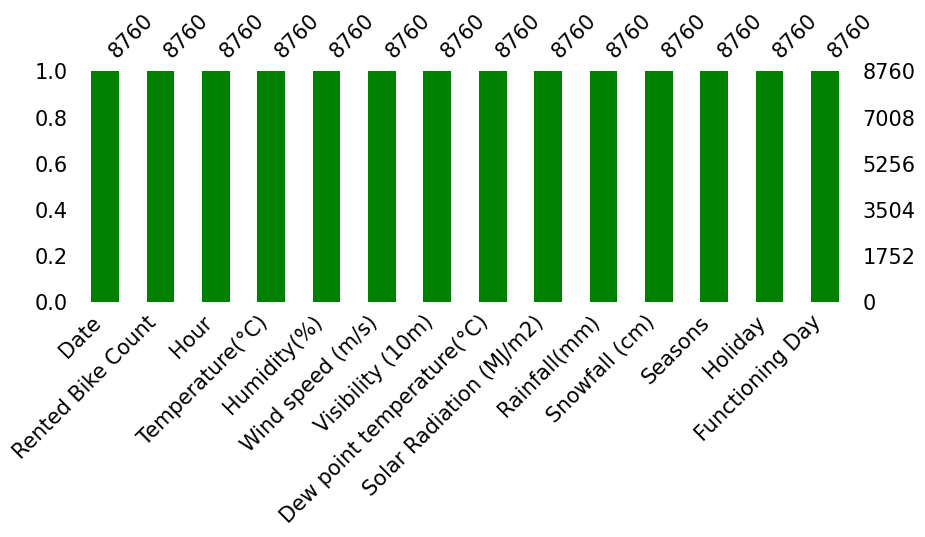

In [11]:
# Visualizing the missing values
import missingno as msno
msno.bar(bike_df, color='green',sort='ascending', figsize=(10,3), fontsize=15)

<Axes: >

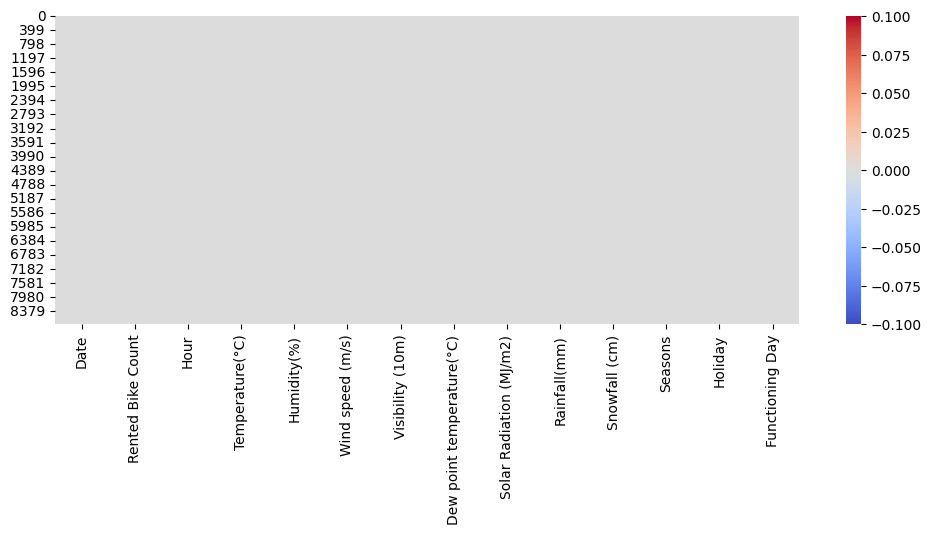

In [12]:
# Visualizing the missing values using Heatmap
plt.figure(figsize=(12,4))
sns.heatmap(bike_df.isna(), cmap = 'coolwarm')

From the above command, we noticed that every column has 0 null values. This seems to be clean data and there is no missing data in any of the rows and columns.

### What did you know about your dataset?

The dataset provided contains 14 columns and 8760 rows and does not have any missing or duplicate values.

The goal is to predict the demand for bike-sharing using this dataset, which is sourced from the bike-sharing services market. Demand prediction involves analytical studies on the probability of a customer using bike-sharing services, with the aim of understanding and managing demand and supply equilibrium throughout the day.

## **3. Understanding Your Variables**

###  Columns

In [13]:
# Dataset Columns
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

###  Statistical Summary###  

In [15]:
# Dataset Describe
bike_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


###  Variables Description

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

<b>Attribute Information: </b>

* **Date :**year-month-day
* **Rented Bike count :**Count of bikes rented at each hour
* **Hour :**Hour of the day
* **Temperature :**Temperature in Celsius
* **Humidity :**%
* **Windspeed :**m/s
* **Visibility :**10m
* **Dew point temperature :**Celsius
* **Solar radiation :**MJ/m2
* **Rainfall :**mm
* **Snowfall :**cm
* **Seasons :**Winter, Spring, Summer, Autumn
* **Holiday :**Holiday/No holiday
* **Functional Day :**NoFunc(Non Functional Hours), Fun(Functional hours)

### Unique Values

In [16]:
# print the unique value
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [17]:
# Check Unique Values for each variable.
for i in bike_df.columns.tolist():
  print("No. of unique values in ",i,"is",bike_df[i].nunique())

No. of unique values in  Date is 365
No. of unique values in  Rented Bike Count is 2166
No. of unique values in  Hour is 24
No. of unique values in  Temperature(°C) is 546
No. of unique values in  Humidity(%) is 90
No. of unique values in  Wind speed (m/s) is 65
No. of unique values in  Visibility (10m) is 1789
No. of unique values in  Dew point temperature(°C) is 556
No. of unique values in  Solar Radiation (MJ/m2) is 345
No. of unique values in  Rainfall(mm) is 61
No. of unique values in  Snowfall (cm) is 51
No. of unique values in  Seasons is 4
No. of unique values in  Holiday is 2
No. of unique values in  Functioning Day is 2


### Observations:

* We are focusing on several key columns of our dataset, including  'Hour', 'Holiday', 'Functioning Day', 'Rented Bike Count', 'Temperature(°C)', and 'Seasons', as they contain a wealth of information.
* By utilizing these features, we plan to create a regression model and implement various regression algorithms.
* There is a column 'Hour' which might be considered a categorical feature or maybe a numerical feature based on the data we will try both and see the result difference.

## **4. EDA**

#### **What is EDA?**
* Exploratory Data Analysis (EDA) is a critical step in the data science process that involves analyzing and understanding the data. The primary objective of EDA is to gain insights into the data, uncover patterns, and detect relationships and trends. This iterative process helps identify outliers, missing values, and other issues that may impact the analysis and modeling of the data.


### **4.1 Creating Some New Features**

In [18]:
# Renaming complex columns name for the sake of simplicity    **(Not a necessary step to do)**
bike_df=bike_df.rename(columns={'Rented Bike Count':'rented_bike_count',
                                'Date':'date',
                                'Hour':'hour',
                                'Seasons':'seasons',
                                'Holiday':'holiday',
                                'Temperature(°C)':'temperature',
                                'Humidity(%)':'humidity',
                                'Wind speed (m/s)':'wind_speed',
                                'Visibility (10m)':'visibility',
                                'Dew point temperature(°C)':'dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'solar_radiation',
                                'Rainfall(mm)':'rainfall',
                                'Snowfall (cm)':'snowfall',
                                'Functioning Day':'functioning_day'})

##### Breaking down date column

In [19]:
# Splitting Date into year, month, day & day_name
bike_df.date = pd.to_datetime(bike_df.date)

bike_df['day'] = bike_df['date'].dt.day
bike_df['month'] = bike_df['date'].dt.month
bike_df['year'] = bike_df['date'].dt.year
bike_df['weekday'] = bike_df['date'].dt.day_name()

# droping Date column
bike_df.drop('date', axis=1, inplace=True)

In [20]:
bike_df.hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

The hours of the day follow a clear sequence, with 9 am being closer to 10 am than it is to 8 am, and farther from 6 pm. This feature can be classified as a discrete ordinal variable. We will consider the hour as a categorical value and transform it into a numerical value to see if there is any difference in the results.

In [21]:
def session(x):

    '''
    For exploratory data analysis (EDA) purposes, the "Hour" column can be converted into categorical variables
    such as "Morning", "Noon", and "Night", without altering the existing label encoding format of the "Hour" column.
    This conversion is not necessary for model training.
    '''

    if x>4 and x<=8:
        return 'Early Morning'
    elif x>8 and x<=12:
        return 'Morning'
    elif x>12 and x<=16:
        return 'Afternoon'
    elif x>16 and x<=20:
        return 'Evening'
    elif x>20 and x<=24:
        return 'Night'
    elif x<=4:
        return 'Late Night'

#apply funtion to make new category column
bike_df['session'] = bike_df['hour'].apply(session)

### **4.2 Column: 'rented_bike_count'**

In [22]:
print(f'Min Count: {bike_df.rented_bike_count.min()}')
print(f'Max Count: {bike_df.rented_bike_count.max()}')

Min Count: 0
Max Count: 3556


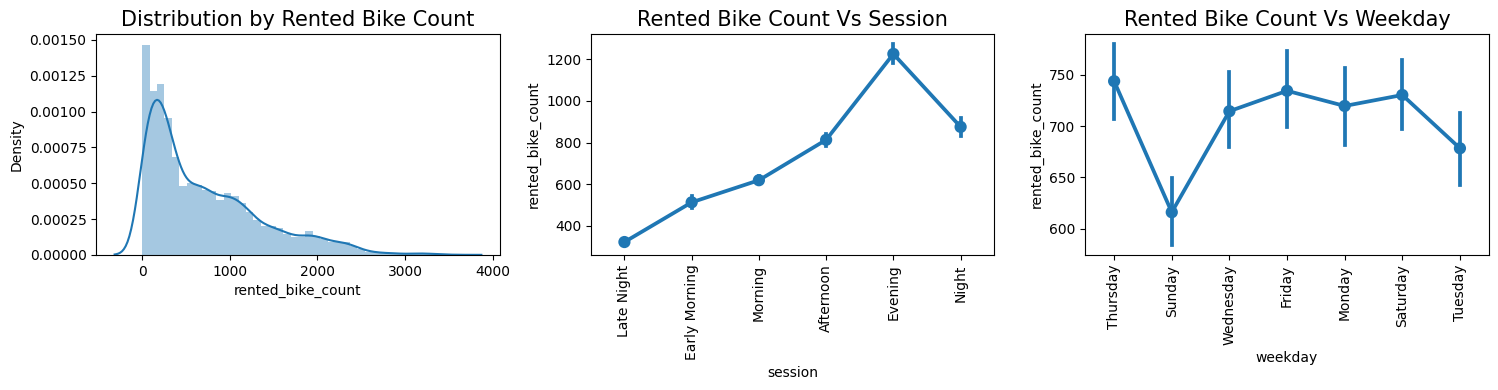

In [23]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Distribution analysis
dist = sns.distplot(bike_df['rented_bike_count'], ax=ax[0])
dist.set_title('Distribution by Rented Bike Count', size=15)

# Bi-variate analysis
# Rented Bike Count Vs Session
point = sns.pointplot(data=bike_df, x='session', y='rented_bike_count', ax=ax[1])
point.set_title('Rented Bike Count Vs Session', size=15)
# Set x-ticks rotation to 90 degrees
point.set_xticklabels(point.get_xticklabels(), rotation=90)

# Bi-variate analysis
# Rented Bike Count Vs Weekday
point = sns.pointplot(data=bike_df, x='weekday', y='rented_bike_count', ax=ax[2])
point.set_title('Rented Bike Count Vs Weekday', size=15)
# Set x-ticks rotation to 90 degrees
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Observation:**
* Distribution of Rented Bike Count is positively skewed and has many outliers. We will treat it later.
* Demand for rented bikes increases in the evening.
* There is the least demand for the rented bike on Sunday.

### **4.3 Column: 'hour'**

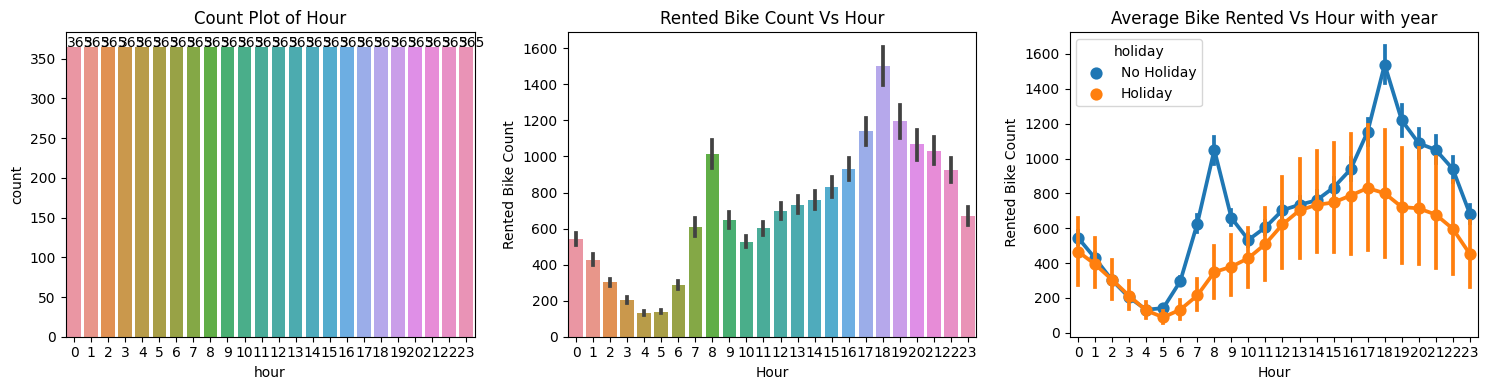

In [24]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
count = sns.countplot(data=bike_df, x='hour', ax=ax[0])
count.set_title('Count Plot of Hour')

# adding value count on the top of bar
for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Bi-variate analysis
# Rented Bike Count Vs Hour
bar = sns.barplot(data=bike_df, x='hour', y='rented_bike_count', ax = ax[1])
bar.set(xlabel='Hour', ylabel='Rented Bike Count', title='Rented Bike Count Vs Hour')

# Multi-variate analysis
point = sns.pointplot(data=bike_df, x='hour', y='rented_bike_count', hue='holiday', ax= ax[2])
point.set(xlabel='Hour', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Hour with year')

plt.tight_layout()
plt.show()

**Observation:**
* Every hour has an equal number of counts in the dataset.
* Demand for rented bike count is higher at 8 AM and 6 PM indicating a high demand during business hours.
* Rented Bike Count follows 2 patterns one for holiday and another for no holiday.
* Holiday: The first pattern is where there is a peak in the rentals at around 8 am and another at around 6 pm. These correspond to local bikers who typically go to work on a working day, Monday to Friday.
* Non-Working Day: Second pattern where there are more or less uniform rentals across the day with a peak at around noon time. These correspond to probable tourists who typically are casual users who rent/drop off bikes uniformly during the day and tour the city on nonworking days which typically are Saturday and Sunday

### **4.4 Column: 'temperature'**

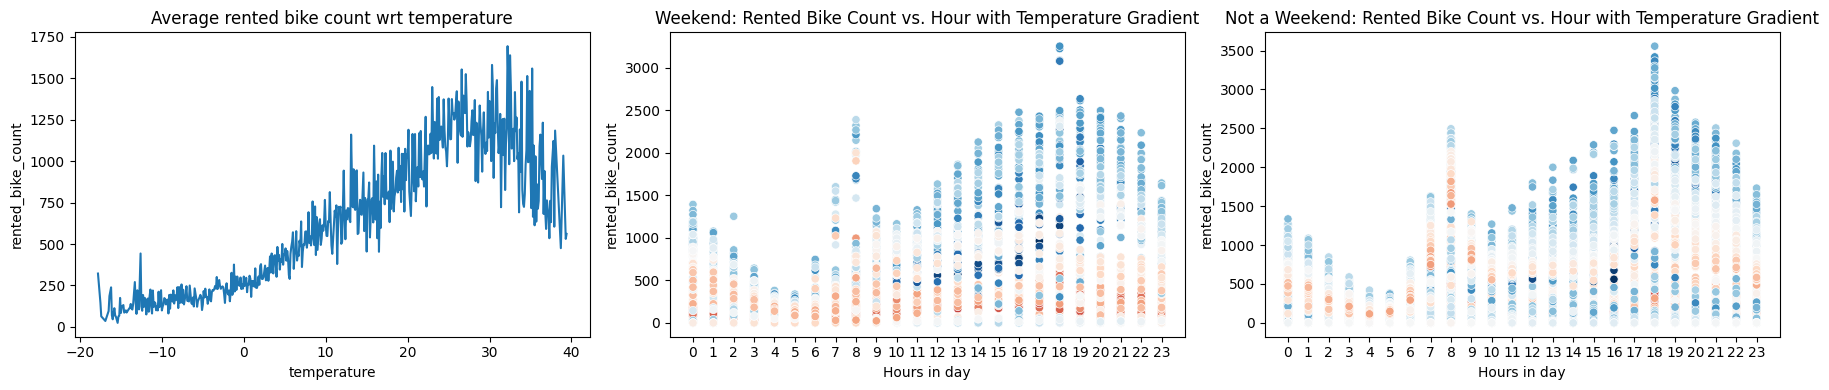

In [25]:
fig,ax = plt.subplots(1,3, figsize=(18,4))

# Univariate analysis
# Dependent Column Value Vs temperature
# group temperature column
temp_wrt_bike_rent_count = bike_df.groupby(['temperature'])['rented_bike_count'].mean().reset_index()

line = sns.lineplot(x = 'temperature', y ='rented_bike_count', data = temp_wrt_bike_rent_count, ax = ax[0])
line.set_title('Average rented bike count wrt temperature')

# Multi-variate analysis
# Dependent Column Value Vs hour with temperature
bike_df_nw = bike_df[(bike_df.weekday != 'Saturday') & (bike_df.weekday != 'Sunday')]
bike_df_w = bike_df[(bike_df.weekday == 'Saturday') | (bike_df.weekday == 'Sunday')]

# Weekend
scatter2 = sns.scatterplot(x=bike_df_w.hour, y=bike_df_w['rented_bike_count'], c=bike_df_w.temperature, cmap="RdBu", ax =ax[1])
scatter2.set(xticks = range(24), xlabel='Hours in day', ylabel='rented_bike_count')
scatter2.set_title('Weekend: Rented Bike Count vs. Hour with Temperature Gradient')

# Not a Weekend
scatter = sns.scatterplot(x=bike_df_nw.hour, y=bike_df_nw['rented_bike_count'], c=bike_df_nw.temperature,cmap="RdBu", ax = ax[2])
scatter.set(xticks = range(24), xlabel='Hours in day', ylabel='rented_bike_count')
scatter.set_title('Not a Weekend: Rented Bike Count vs. Hour with Temperature Gradient')


plt.tight_layout()
plt.show()

**Observation:**
* We can see from the line plot above that the average number of bikes rented with temperature increases steadily, with a slight decrease at the highest temperature.
* People prefer renting bikes in warm environments. Therefore, the demand for bicycles is high if the temperature is sufficiently warm, but extremely hot temperatures are also unsuitable for bike demand.
* However, there is a slight decrease in count if the temperature is too high (the darkest of the blue dots).

### **4.5 Column: 'humidity'**

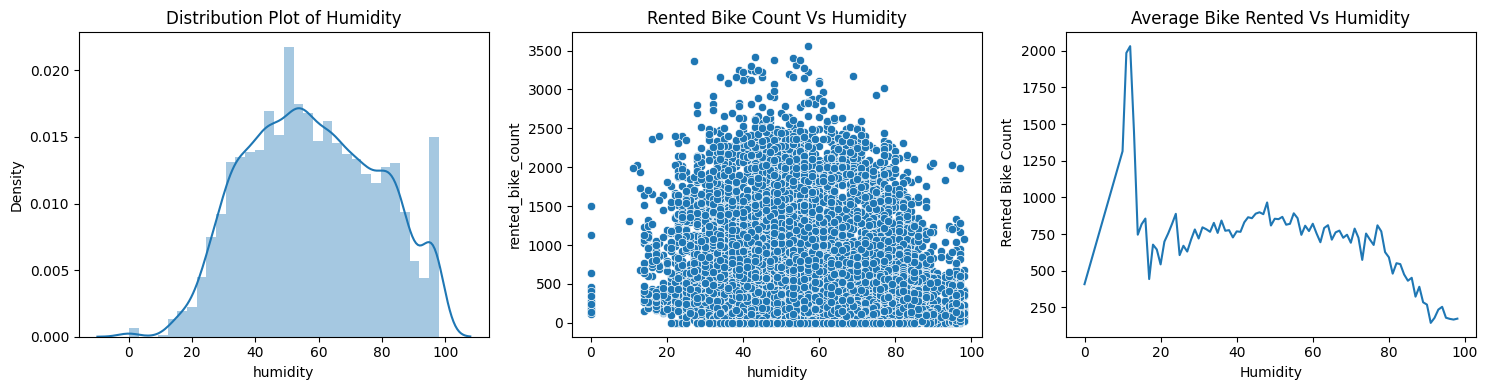

In [26]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_df.humidity, ax = ax[0])
dist.set_title('Distribution Plot of Humidity')

# Bi-variate analysis
# Rented Bike Count Vs Humidity
scatter = sns.scatterplot(data=bike_df, x='humidity', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='humidity', ylabel='rented_bike_count', title='Rented Bike Count Vs Humidity')

# Line Plot
group_wind_speed = bike_df.groupby(['humidity'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data=group_wind_speed, x='humidity', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Humidity', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Humidity')

plt.tight_layout()
plt.show()

**Observation:**
* We can see from the plots above that the average number of bikes rented goes up and down sharply with the peak at around 50. For the number of rented bikes in demand, the most preferred humid environment is 20-90.

### **4.6 Column: 'wind_speed'**

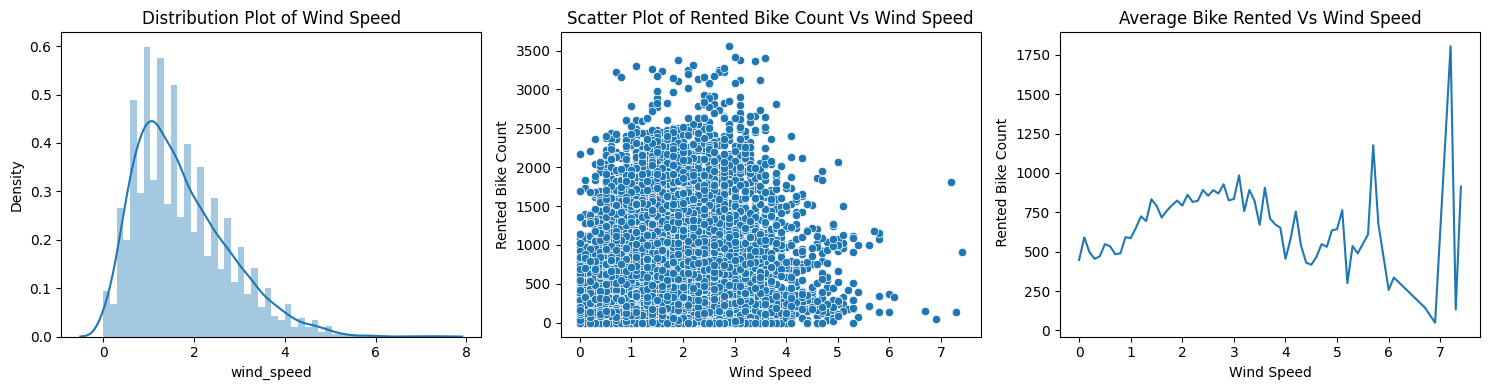

In [27]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_df.wind_speed, ax = ax[0])
dist.set_title('Distribution Plot of Wind Speed')

# Bi-variate analysis
# Rented Bike Count Vs Wind Speed
scatter = sns.scatterplot(data=bike_df, x='wind_speed', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Wind Speed', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Wind Speed')

# Line Plot
group_wind_speed = bike_df.groupby(['wind_speed'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data=group_wind_speed, x='wind_speed', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Wind Speed', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Wind Speed')

plt.tight_layout()
plt.show()

**Observation:**
* We can see from the distribution plot that wind speed is slightly positively skewed.
* Scatter Plot tells us about the distribution of the wind speed and rented bike count, and how the values of the two variables are related to each other.
* Line plot tells us that people prefer moderate wind but there is a spike at wind speed 7.

### **4.7 Column: 'visibility'**

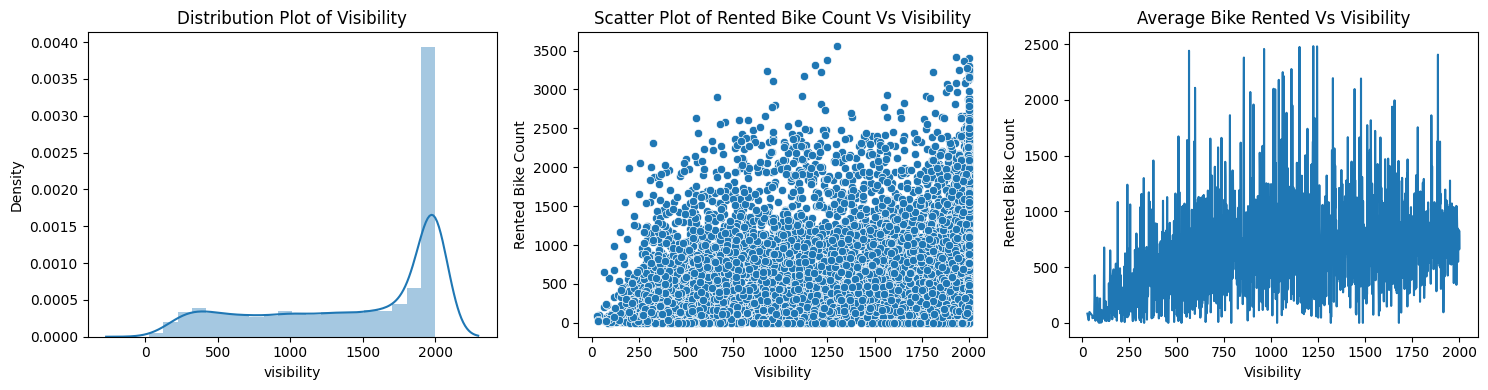

In [28]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_df.visibility, ax = ax[0])
dist.set_title('Distribution Plot of Visibility')

# Bi-variate analysis
# Rented Bike Count Vs Visibility
scatter = sns.scatterplot(data=bike_df, x='visibility', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Visibility', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Visibility')

# Line Plot
group_visibility = bike_df.groupby(['visibility'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data=group_visibility, x='visibility', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Visibility', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Visibility')

plt.tight_layout()
plt.show()


**Observation:**
* Visibility is highly skewed to the left side.
* We can see from these plots above that as visibility rises, so does rented_bike_count.

### **4.8 Column: 'dew_point_temperature'**

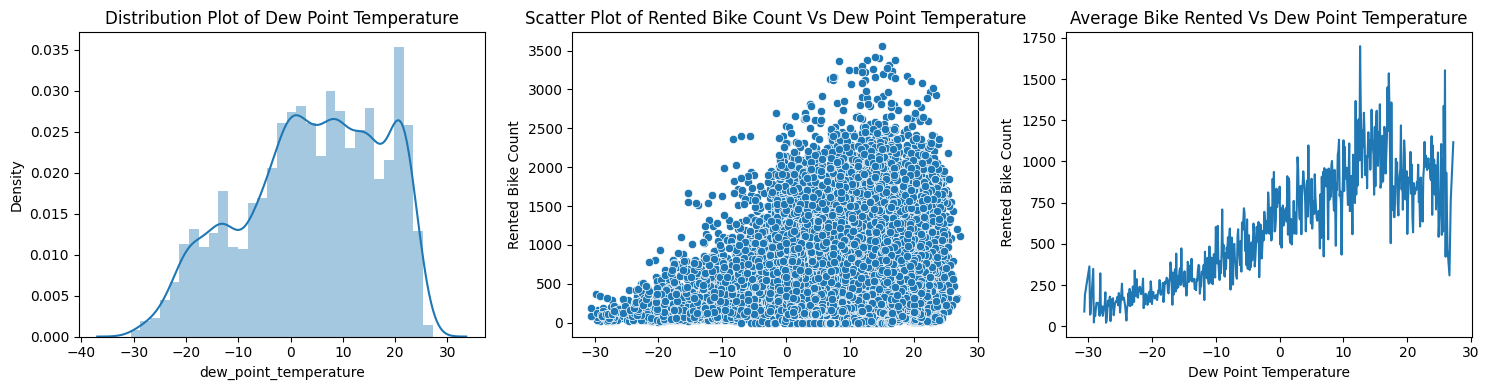

In [29]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_df.dew_point_temperature, ax = ax[0])
dist.set_title('Distribution Plot of Dew Point Temperature')

# Bi-variate analysis
# Rented Bike Count Vs Dew Point Temperature
scatter = sns.scatterplot(data=bike_df, x='dew_point_temperature', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Dew Point Temperature', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Dew Point Temperature')

# Line Plot
group_dew_point_temperature = bike_df.groupby(['dew_point_temperature'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data = group_dew_point_temperature, x ='dew_point_temperature', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Dew Point Temperature', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Dew Point Temperature')

plt.tight_layout()
plt.show()

**Observation:**
* We can see from the distribution plot that solar radiation is highly skewed to positive.
* The average number of bikes rented goes up with solar radiation.
* Additionally, this column is directly related to the temperature column.

### **4.10 Column: 'rainfall'**

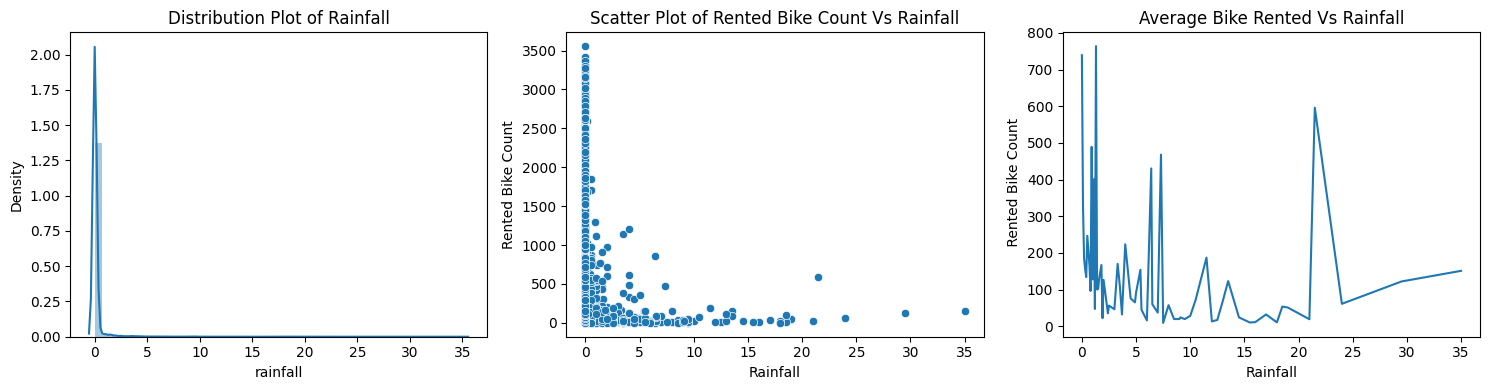

In [30]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_df.rainfall, ax = ax[0])
dist.set_title('Distribution Plot of Rainfall')

# Bi-variate analysis
# Rented Bike Count Vs Rainfall
scatter = sns.scatterplot(data=bike_df, x='rainfall', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Rainfall', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Rainfall')

# Line Plot
group_rainfall = bike_df.groupby(['rainfall'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data = group_rainfall, x ='rainfall', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Rainfall', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Rainfall')

plt.tight_layout()
plt.show()

**Observation:**
* Distribution of rainfall is highly skewed to the positive side.
* People prefer almost no or very less rainfall.

### **4.11 Column: 'snowfall'**

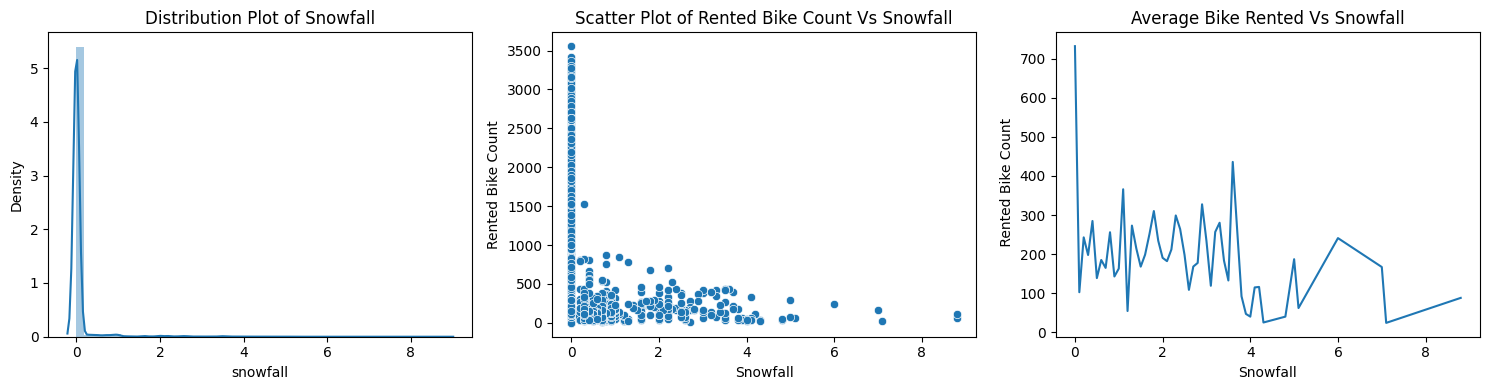

In [31]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_df.snowfall, ax = ax[0])
dist.set_title('Distribution Plot of Snowfall')

# Bi-variate analysis
# Rented Bike Count Vs Snowfall
scatter = sns.scatterplot(data=bike_df, x='snowfall', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Snowfall', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Snowfall')

# Line Plot
group_snowfall = bike_df.groupby(['snowfall'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data = group_snowfall, x ='snowfall', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Snowfall', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Snowfall')

plt.tight_layout()
plt.show()

**Observation:**
* Distribution of snowfall is highly skewed to the positive side.
* People prefer almost no or very less snowfall.

### **4.12 Column: 'seasons'**

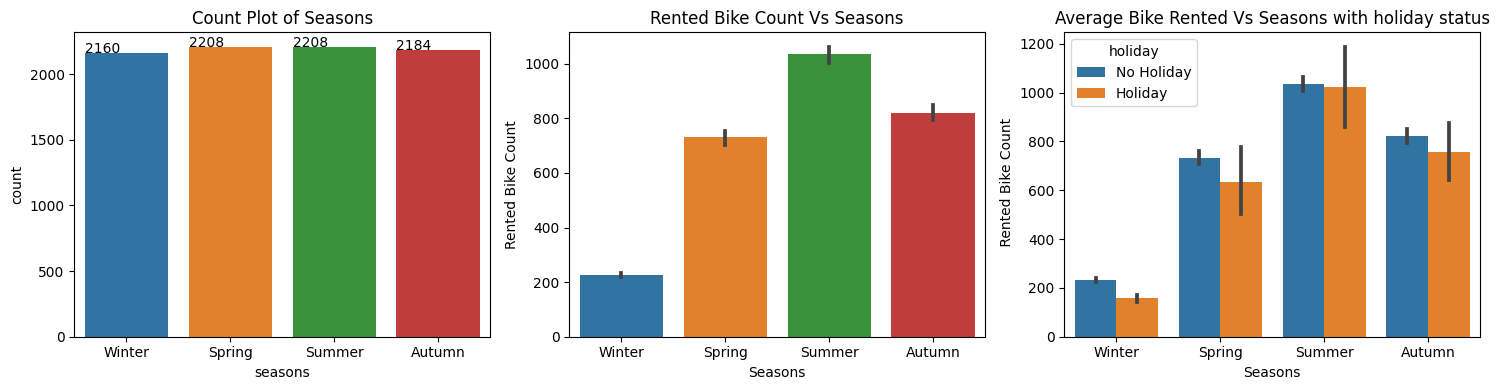

In [32]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
count = sns.countplot(data=bike_df, x='seasons', ax=ax[0])
count.set_title('Count Plot of Seasons')

# adding value count on the top of bar
for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Bi-variate analysis
# Rented Bike Count Vs Seasons
bar = sns.barplot(data=bike_df, x='seasons', y='rented_bike_count', ax = ax[1])
bar.set(xlabel='Seasons', ylabel='Rented Bike Count', title='Rented Bike Count Vs Seasons')

# Multi-variate analysis
cat = sns.barplot(data=bike_df, x='seasons', y='rented_bike_count', hue='holiday', ax= ax[2])
cat.set(xlabel='Seasons', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Seasons with holiday status')

plt.tight_layout()
plt.show()

**Observation:**
* Dataset has 4 seasons and every season has more than 2000 counts.
* The most preferred season for the rented_bike_count is summer and the least preferred is winter which means that people prefer to rent bikes in warm temperatures.
* In every season on a no holiday rented_bike_count has more count than on a holiday.

### **4.13 Column: 'holiday'**

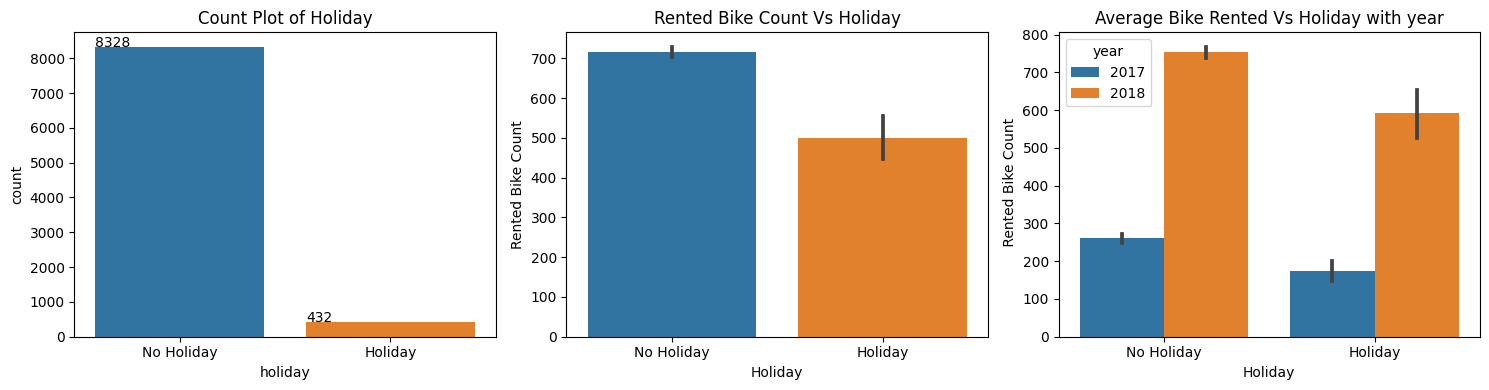

In [33]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
count = sns.countplot(data=bike_df, x='holiday', ax=ax[0])
count.set_title('Count Plot of Holiday')

# adding value count on the top of bar
for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Bi-variate analysis
# Rented Bike Count Vs Holiday
bar = sns.barplot(data=bike_df, x='holiday', y='rented_bike_count', ax = ax[1])
bar.set(xlabel='Holiday', ylabel='Rented Bike Count', title='Rented Bike Count Vs Holiday')

# Multi-variate analysis
cat = sns.barplot(data=bike_df, x='holiday', y='rented_bike_count', hue='year', ax= ax[2])
cat.set(xlabel='Holiday', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Holiday with year')

plt.tight_layout()
plt.show()

**Observation:**
* Dataset has more records of No holiday than a holiday which is obvious as most of the days are working days.
* When there are no holidays, demand for bike sharing is higher than when there are holidays, indicating that business-related bike rentals are preferred.
* Dataset has more records of 2018 than 2017.

### **4.14 Column: 'functioning_day'**

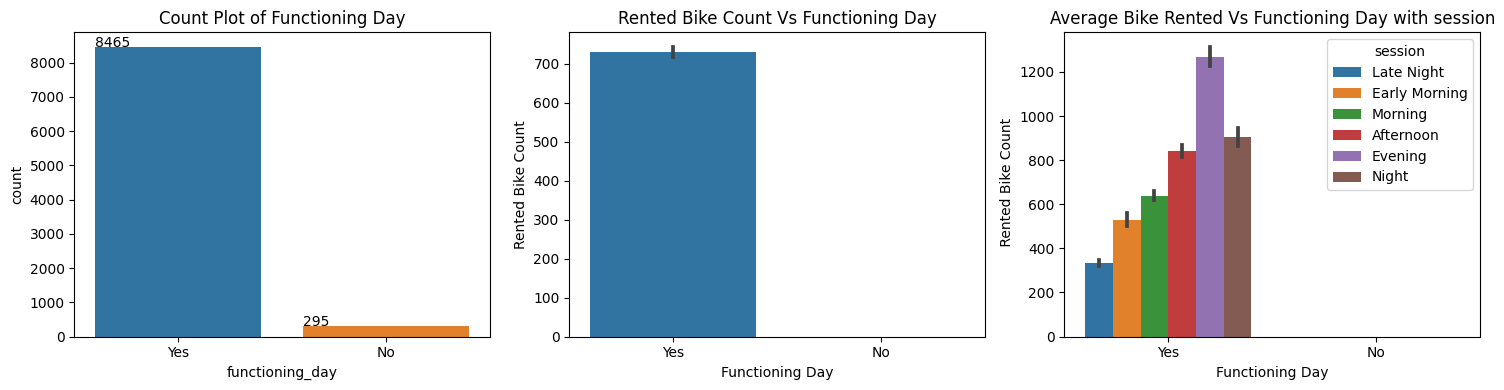

In [34]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
count = sns.countplot(data=bike_df, x='functioning_day', ax=ax[0])
count.set_title('Count Plot of Functioning Day')

# adding value count on the top of bar
for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Bi-variate analysis
# Rented Bike Count Vs Functioning Day
bar = sns.barplot(data=bike_df, x='functioning_day', y='rented_bike_count', ax = ax[1])
bar.set(xlabel='Functioning Day', ylabel='Rented Bike Count', title='Rented Bike Count Vs Functioning Day')

# Multi-variate analysis
cat = sns.barplot(data=bike_df, x='functioning_day', y='rented_bike_count', hue='session', ax= ax[2])
cat.set(xlabel='Functioning Day', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Functioning Day with session')

plt.tight_layout()
plt.show()

**Observation:**
* Dataset has more records of Functioning Day than no functioning day which is obvious as most of the days are working days.
* Even though we have some counts of no functioning days still there is no bike rented on a no functioning day.
* On a functioning day, the evening session has the most rented bike count.

## **5. Data Cleaning**

#### **What is data cleaning?**
* Data cleaning is the process of identifying and correcting or removing inaccuracies, inconsistencies, and missing values in a dataset. It is an important step in the data preparation process that ensures that the data is accurate, complete, and in a format that can be easily analyzed. Data cleaning may include tasks such as removing duplicate records, filling in missing values, correcting errors, and standardizing data formats. The goal of data cleaning is to improve the quality of the data and make it suitable for further analysis and modeling.

### **5.1 Duplicate Values**

In [35]:
# counting duplicate values
bike_df.duplicated().sum()

0

There is no duplicate record in the dataset

### **5.2 Missing Values**

In [36]:
# Missing Values/Null Values Count
print(bike_df.isnull().sum())

rented_bike_count        0
hour                     0
temperature              0
humidity                 0
wind_speed               0
visibility               0
dew_point_temperature    0
solar_radiation          0
rainfall                 0
snowfall                 0
seasons                  0
holiday                  0
functioning_day          0
day                      0
month                    0
year                     0
weekday                  0
session                  0
dtype: int64


<Axes: >

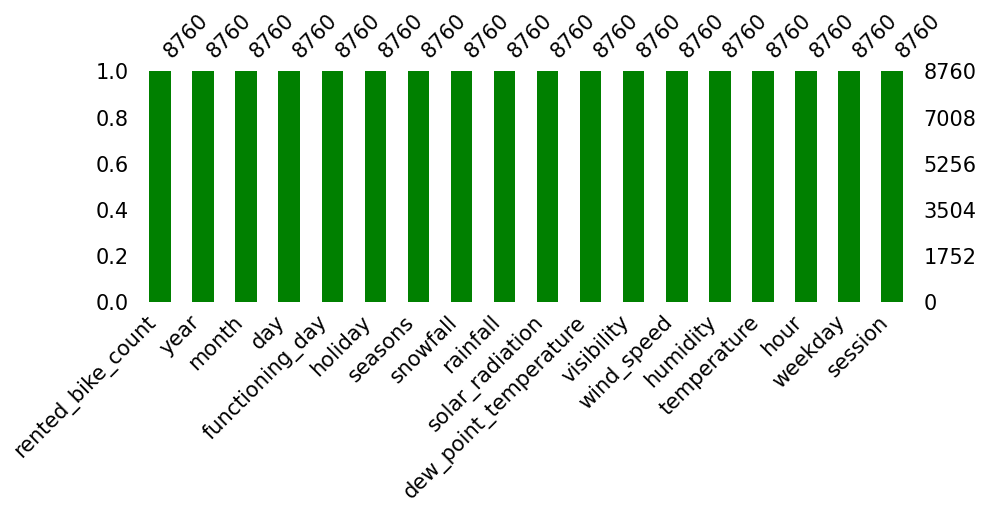

In [37]:
# Visualizing the missing values
import missingno as msno
msno.bar(bike_df, color='green',sort='ascending', figsize=(10,3), fontsize=15)

Fortunately there is no missing value in the dataset

### **5.3 Skewness**

In [38]:
# statistical summary
bike_df.describe().T

,count,mean,std,min,25%,50%,75%,max
rented_bike_count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
temperature,8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
humidity,8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
wind_speed,8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
visibility,8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
dew_point_temperature,8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
solar_radiation,8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
rainfall,8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
snowfall,8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


As can be seen in the statistical summary for numerical features, there is a significant difference between the 75% percentile and maximum value, indicating that the dataset contains skewness and outliers.

In [39]:
numerical_features = []
categorical_features = []

# splitting features into numeric and categoric.
'''
If feature has more than 35 categories we will consider it
as numerical_features, remaining features will be added to categorical_features.
'''
for col in bike_df.columns:
  if bike_df[col].nunique() > 35:
    numerical_features.append(col)
  else:
    categorical_features.append(col)

print(f'Numerical Features : {numerical_features}')
print(f'Categorical Features : {categorical_features}')

Numerical Features : ['rented_bike_count', 'temperature', 'humidity', 'wind_speed', 'visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall', 'snowfall']
Categorical Features : ['hour', 'seasons', 'holiday', 'functioning_day', 'day', 'month', 'year', 'weekday', 'session']


In [40]:
# we do not want any transformation in our target variable as it is possible to have outlier is Seoul Environment
numerical_features.remove('rented_bike_count')
# removing rainfall and snowfall as it may remove important information as these 2 columns are highly skewed.
numerical_features.remove('rainfall')
numerical_features.remove('snowfall')


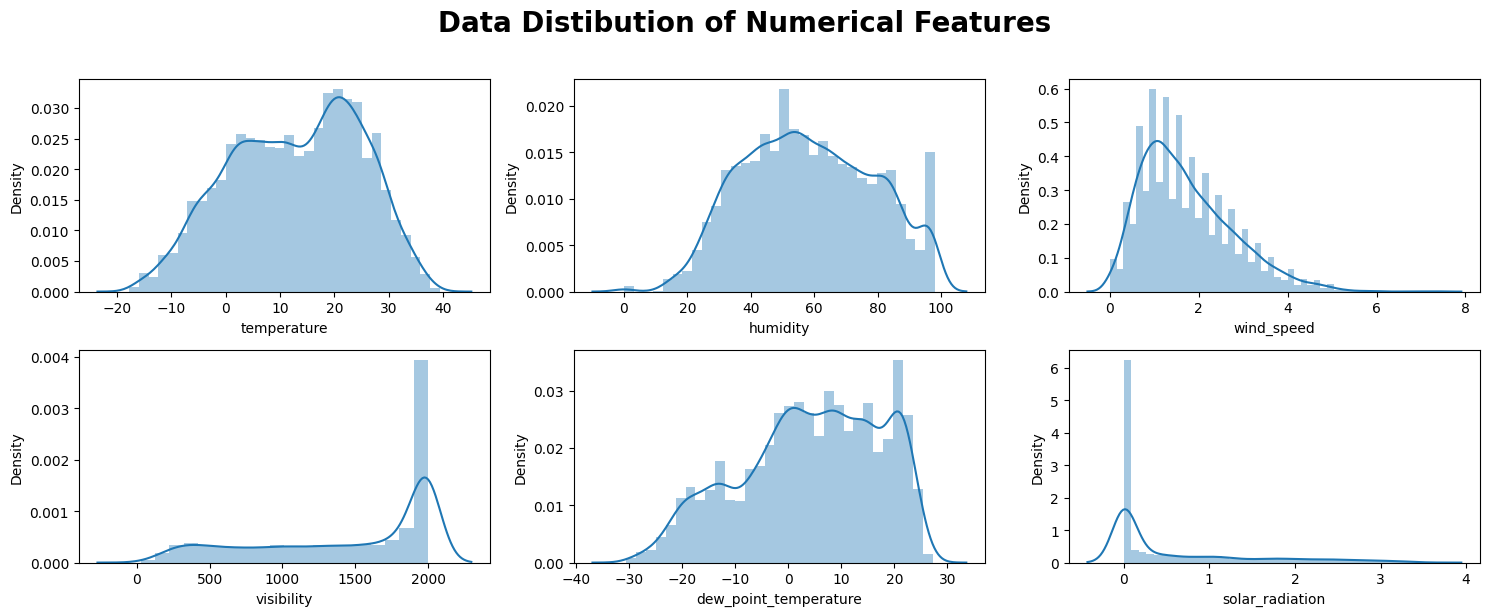

In [41]:
# figsize
plt.figure(figsize=(15,6))
# title
plt.suptitle('Data Distibution of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(2, 3, i+1)                       # subplots 2 rows, 3 columns

  # dist plots
  sns.distplot(bike_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

**Observation:**
* For numerical features, we can see that the majority of distributions are right-skewed. The distribution of rainfall, snowfall, and solar radiation is highly skewed to the right. It demonstrates that these columns have many outliers. Some columns are negatively skewed.
* Some of the variables can get a normal distribution when outliers are removed. As a result, it appears that outliers should be removed before the transformation. First, we will get rid of outliers, and then we check to see if we need to use the transformation technique again.

### **5.4 Treating Outliers**

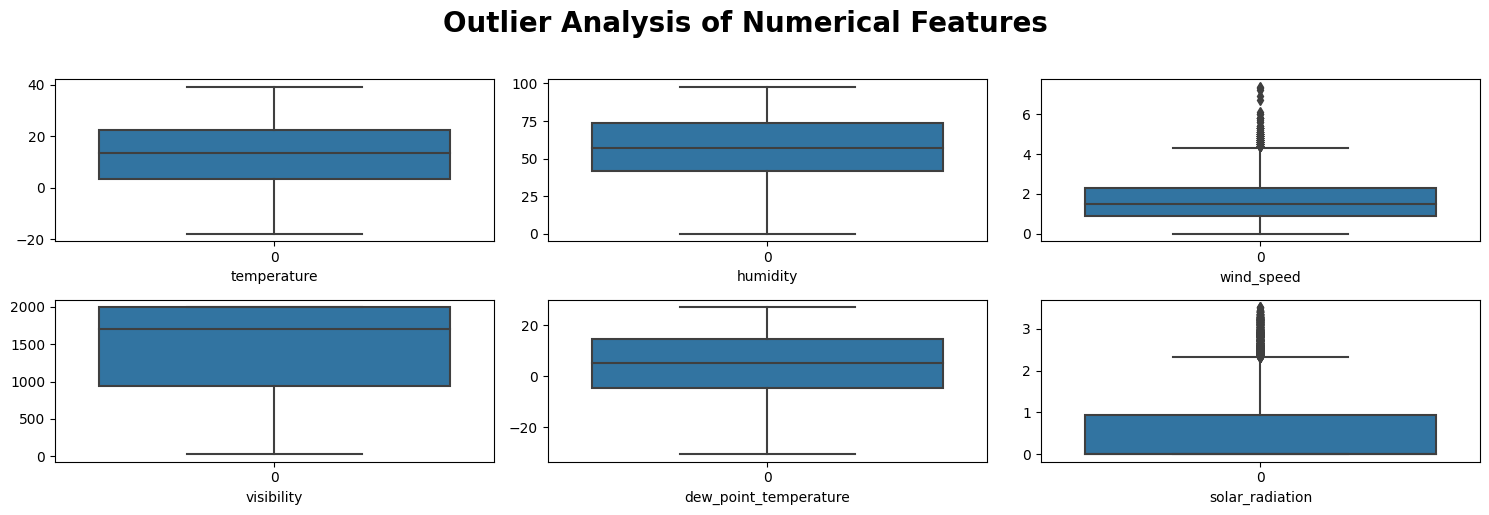

In [42]:
# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(2, 3, i+1)            # subplot of 2 rows and 3 columns

  # countplot
  sns.boxplot(bike_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

**Observation:**
* Outliers are visible in the 'wind_speed', and 'solar_radiation' columns.

* Since we have limited datapoint hence we are not simply removing the outlier instead of that we are using the clipping method.

**Clipping Method:** In this method, we set a cap on our outliers data, which means that if a value is higher than or lower than a certain threshold, all values will be considered outliers. This method replaces values that fall outside of a specified range with either the minimum or maximum value within that range.

In [43]:
# we are going to replace the datapoints with upper and lower bound of all the outliers

def clip_outliers(bike_df):
    for col in bike_df[numerical_features]:
        # using IQR method to define range of upper and lower limit.
        q1 = bike_df[col].quantile(0.25)
        q3 = bike_df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # replacing the outliers with upper and lower bound
        bike_df[col] = bike_df[col].clip(lower_bound, upper_bound)
    return bike_df

In [44]:
# using the function to treat outliers
bike_df = clip_outliers(bike_df)

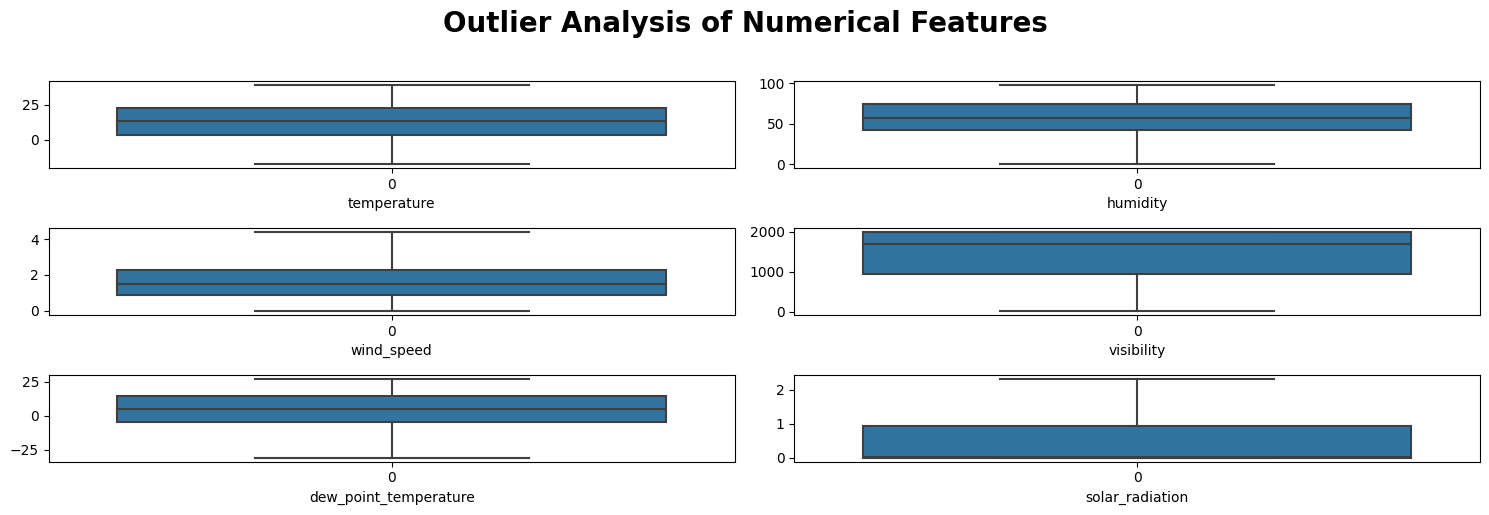

In [45]:
# checking the boxplot after outlier treatment

# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(3, 2, i+1)            # subplot of 3 rows and 2 columns

  # countplot
  sns.boxplot(bike_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

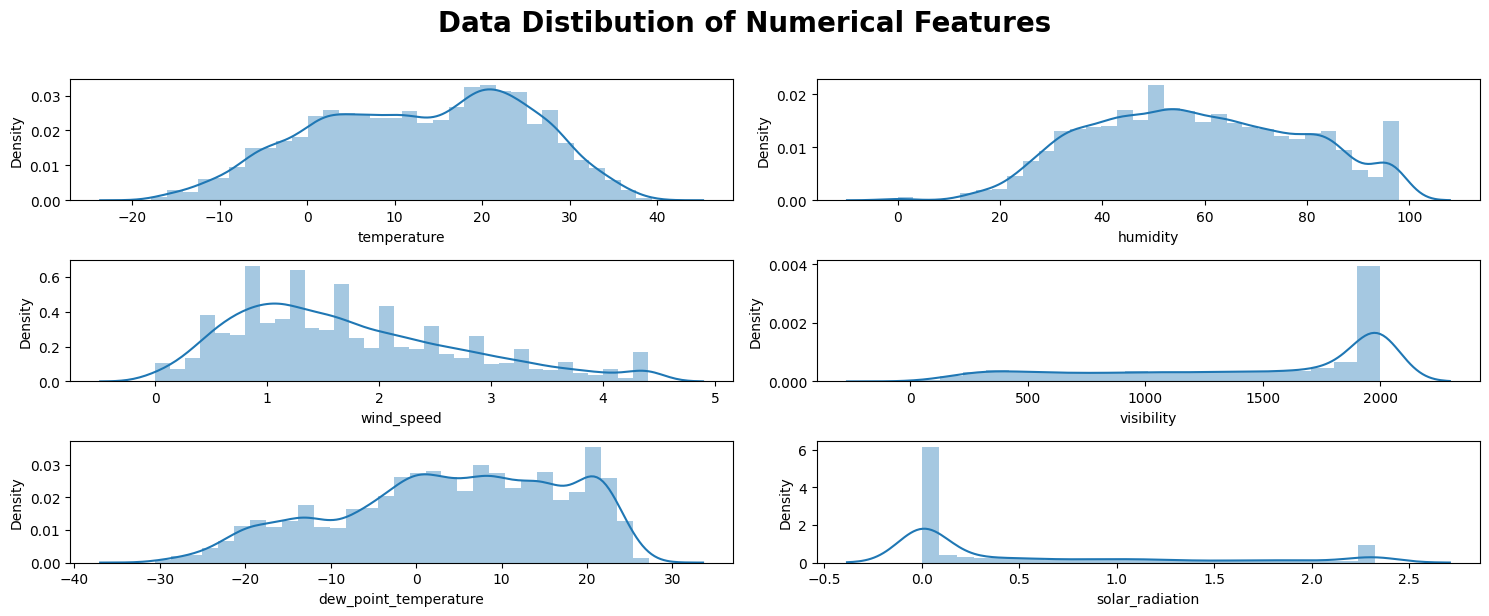

In [46]:
# checking for distribution after treating outliers.

# figsize
plt.figure(figsize=(15,6))
# title
plt.suptitle('Data Distibution of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(3, 2, i+1)                       # subplots 3 rows, 2 columns

  # dist plots
  sns.distplot(bike_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

* We can also observe some shifts in the distribution of the data after treating outliers. Some of the data were skewed before handling outliers, but after doing so, the features almost follow the normal distribution. Therefore, we are not utilizing the numerical feature transformation technique.

## **6. Feature Engineering**

* Feature engineering is the process of creating new features from existing ones to improve the performance of a machine-learning model. This involves transforming raw data into a more useful and informative form, by either creating new features from the existing data or selecting only the most relevant features from the raw data.
* The goal of feature engineering is to extract relevant information from the raw data and represent it in a way that can be easily understood by the machine learning model. The success of a machine learning model depends heavily on the quality of the features used as inputs, so feature engineering plays an important role in model performance.

### **6.1 Regression plot**

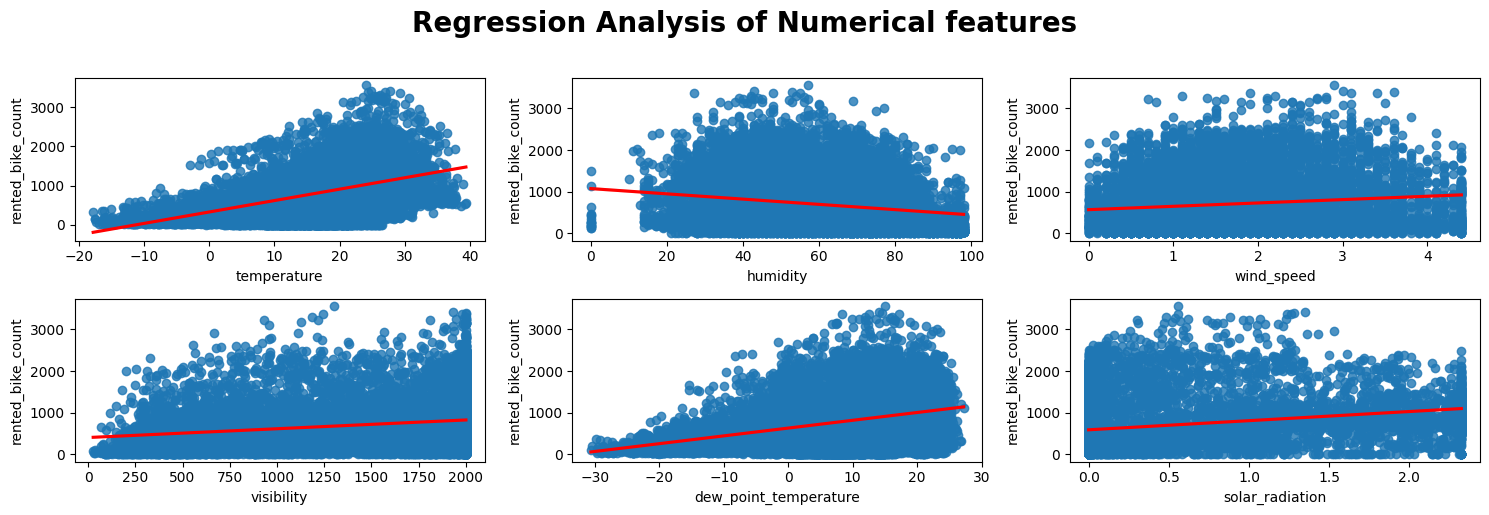

In [47]:
# Checking Linearity of all numerical features with our target variable

# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Regression Analysis of Numerical features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(2, 3, i+1)                     # subplots of 2 rows and 3 columns

  # regression plots
  sns.regplot(x=bike_df[col], y='rented_bike_count', data=bike_df, line_kws={"color":"r"})
  # x-axis lable
  plt.xlabel(col)
  plt.tight_layout()

* Most of the numerical features are positively correlated to our target variable.

### **6.2 Correlation Coefficient and Heatmap**

* The correlation coefficient is a numerical measure of the strength and direction of a linear relationship between two variables. In other words, it measures the extent to which changes in one variable are associated with changes in the other variable. The correlation coefficient ranges from -1 to 1, with -1 indicating a perfect negative correlation, 1 indicating a perfect positive correlation, and 0 indicating no correlation.

* The correlation coefficient is an important tool in data analysis and machine learning, as it can help to identify relationships between variables and can be used in feature selection techniques to remove highly correlated features, which can reduce overfitting and improve the performance of the model.

<Axes: >

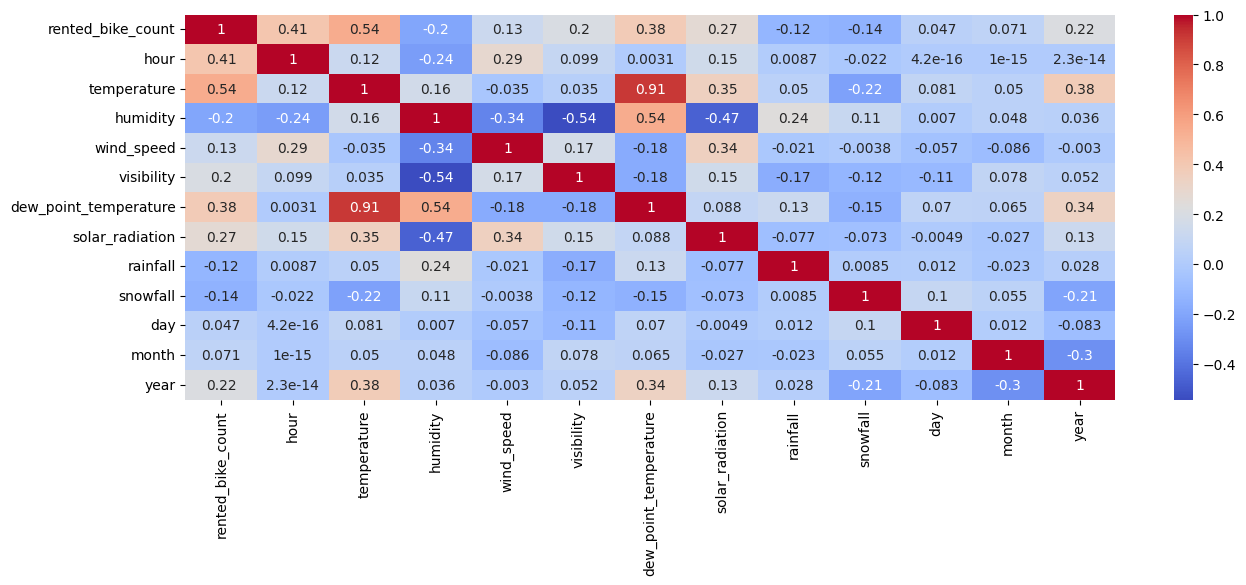

In [48]:
# Plotting correlation heatmap
plt.figure(figsize=(15,5))
sns.heatmap(bike_df.corr(), annot=True, cmap='coolwarm')

In [49]:
# find and remove correlated features

def correlation(dataset, threshold):
    col_corr = set()                                           # Set of all the names of correlated features
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:        # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]               # getting the name of column
                col_corr.add(colname)
    return col_corr

In [50]:
# checking the highly correlated features
correlation(bike_df, 0.7)          # setting threshold of 0.7

{'dew_point_temperature'}

* Since dew_point_temperature and temperature have a correlation coefficient of 0.91 and dew_point_temperature is less correlated to our target variable hence dropping dew_point_temperature.

In [51]:
# droping dew_point_temperature column due to multi-collinearity

bike_df.drop('dew_point_temperature', axis=1, inplace=True)

### **6.3 VIF**

VIF (Variance Inflation Factor) analysis is a statistical method used to identify multicollinearity in a set of predictor variables. Multicollinearity is a situation where two or more predictor variables in a regression model are highly correlated with each other, meaning that they provide redundant information about the response variable.

VIF analysis is an important step in the development of a regression model, as it helps to ensure that the results are reliable and interpretable and that the predictor variables are not providing redundant information.

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

  # For each X, calculate VIF and save in dataframe
  vif = pd.DataFrame()
  vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif["features"] = X.columns

  return vif

In [53]:
calc_vif(bike_df[[i for i in bike_df.describe().columns]])

,VIF Factor,features
0,4.152630,rented_bike_count
1,5.055598,hour
2,4.967449,temperature
3,24.956820,humidity
4,5.052784,wind_speed
5,10.660305,visibility
6,2.904267,solar_radiation
7,1.110419,rainfall
8,1.147299,snowfall
9,4.419318,day


Since the VIF factor of 'year' is too large hence we will remove the year from our data to build our model.

In [54]:
# droping year column due to multi-collinearity

bike_df.drop('year', axis=1, inplace=True)

# dropping columns those were created for EDA purpose only and do not account for any information addition
bike_df.drop('weekday', axis=1, inplace=True)         # day column is already present with ordinal numbering
bike_df.drop('session', axis=1, inplace=True)         # hour column is already present with ordinal numbering

In [55]:
# Calculating the VIF again
calc_vif(bike_df[[i for i in bike_df.describe().columns]])

,VIF Factor,features
0,4.112963,rented_bike_count
1,4.717261,hour
2,4.455828,temperature
3,7.106271,humidity
4,4.833217,wind_speed
5,5.554467,visibility
6,2.368061,solar_radiation
7,1.104537,rainfall
8,1.136376,snowfall
9,3.859202,day


These are our final numerical variables to be considered for model building.

### **6.4 Encoding**

Encoding is a technique in feature engineering that is used to convert categorical variables into numerical values that can be used by machine learning algorithms.

There are several encoding techniques, including:

* One-hot encoding: creates a binary column for each unique category, with a value of 1 indicating the presence of the category and 0 indicating the absence.
* Label encoding: assigns a unique integer value to each category.
* Ordinal encoding: assigns an ordered integer value to each category based on the natural ordering of the categories.
* Count encoding: replaces a categorical value with the number of times it appears in the dataset.

In [56]:
# removing column from categorical_features list which have been removed from DataFrame
categorical_features.remove('year')
categorical_features.remove('weekday')
categorical_features.remove('session')

# Check Unique Values for each categorical variable.
for i in categorical_features:
  print("No. of unique values in",i,"is",bike_df[i].nunique())

No. of unique values in hour is 24
No. of unique values in seasons is 4
No. of unique values in holiday is 2
No. of unique values in functioning_day is 2
No. of unique values in day is 31
No. of unique values in month is 12


We will use one hot encoding for 'seasons' and  Numeric encoding for 'holiday' and 'functioning_day'. Other columns are already encoded.

In [57]:
# One Hot Encoding

# One-hot encode the 'seasons' feature
seasons_onehot = pd.get_dummies(bike_df['seasons'], prefix='seasons')

# drop the original features
bike_df.drop('seasons', axis=1, inplace=True)

# concatenate the one-hot encoded season feature with the rest of the data
bike_df = pd.concat([bike_df, seasons_onehot], axis=1)

In [58]:
# Numerical Encoding for holiday and functioning_day

bike_df['holiday'] = bike_df['holiday'].map({'Holiday': 1, 'No Holiday': 0})
bike_df['functioning_day'] = bike_df['functioning_day'].map({'Yes': 1, 'No': 0})

### **6.5 Normalization of Target Variable**

A fundamental component of data mining is data normalization, also known as data pre-processing. It refers to transforming the data, specifically converting the source data into a different format that makes it possible to effectively process the data. Data normalization's primary goal is to reduce or even eliminate duplicate data.

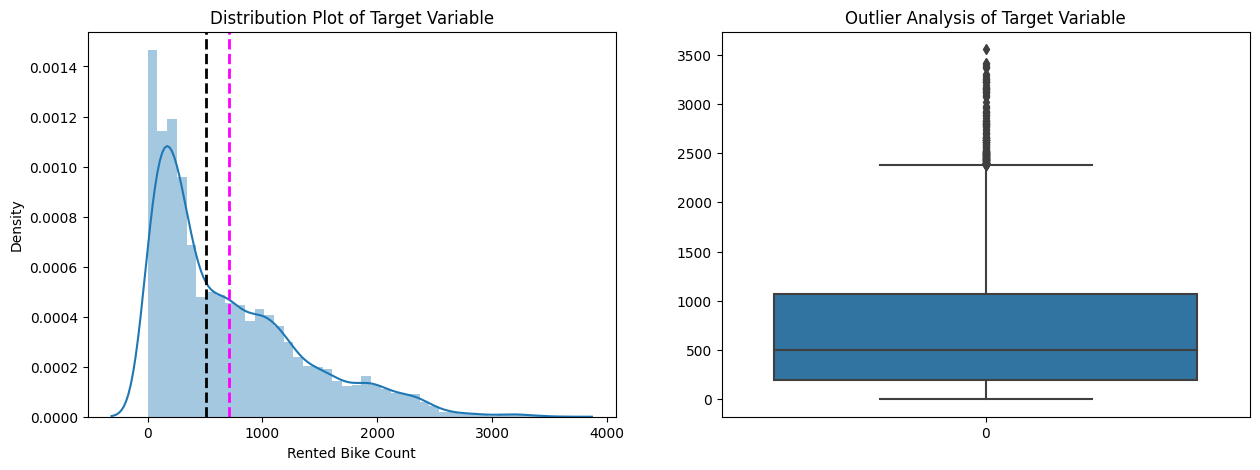

In [59]:
fig, ax = plt.subplots(1,2 , figsize = (15,5))

# Distribution plot of Rented Bike Count
dist =sns.distplot(bike_df['rented_bike_count'],hist=True, ax = ax[0])
dist.set(xlabel = 'Rented Bike Count', ylabel ='Density', title = 'Distribution Plot of Target Variable')

# mean line
dist.axvline(bike_df['rented_bike_count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
# median line
dist.axvline(bike_df['rented_bike_count'].median(), color='black', linestyle='dashed', linewidth=2)

# Boxplot
box = sns.boxplot(bike_df.rented_bike_count, ax= ax[1])
box.set(title = 'Outlier Analysis of Target Variable')
plt.show()

**Observation**
* The graph above indicates that the Rented Bike Count has a moderate right skewness. Linear regression assumes that the dependent variable has a normal distribution, therefore, to meet this assumption, we need to take some measures to normalize the distribution.
* The boxplot above indicates that there are outliers in the rented bike count column.

<Axes: xlabel='rented_bike_count', ylabel='Density'>

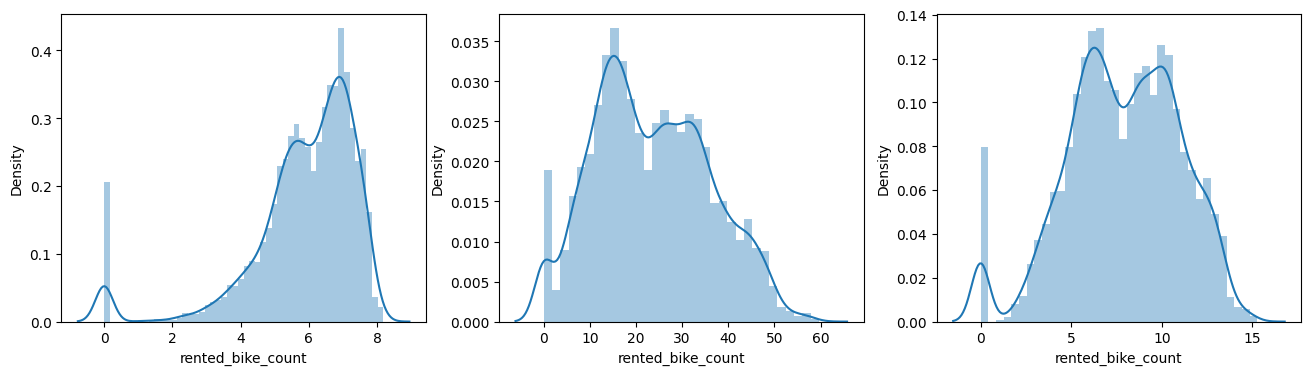

In [60]:
# checking the best transformation for our target variable
fig, axs = plt.subplots(1,3, figsize=(16,4))

sns.distplot(np.log1p(bike_df['rented_bike_count']),kde=True, ax=axs[0])
sns.distplot(np.sqrt(bike_df['rented_bike_count']),kde=True, ax=axs[1])
sns.distplot(np.cbrt(bike_df['rented_bike_count']),kde=True, ax=axs[2])

**Observations**
* Applying a logarithmic transformation to the dependent variable did not help much as it resulted in a negatively skewed distribution.
* Square root and cube root transformations were attempted, but they did not result in a normally distributed variable.
* Therefore, we will use a square root transformation for the regression as it transformed the variable into a well-distributed form.

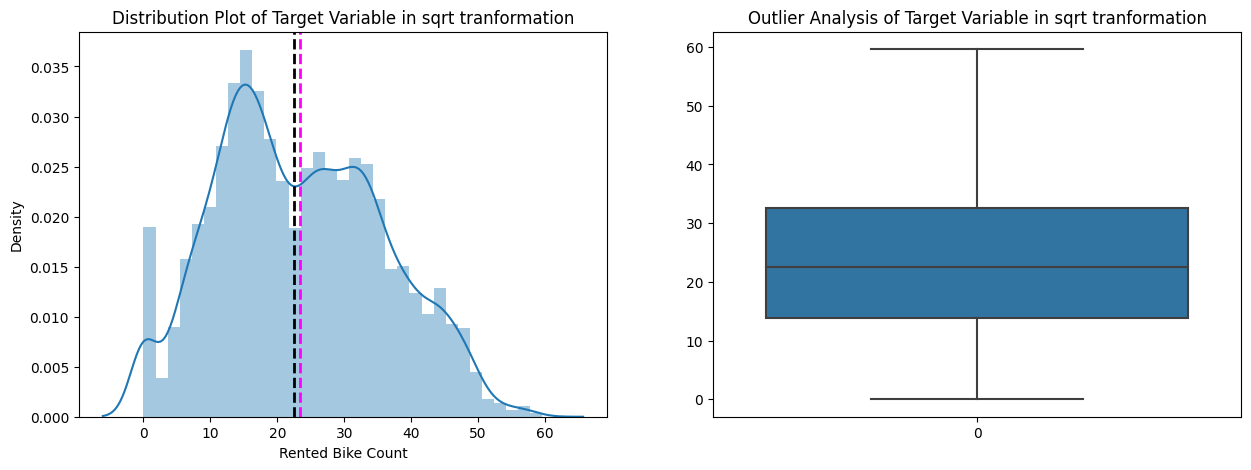

In [61]:
fig, ax = plt.subplots(1,2 , figsize = (15,5))

#  checking square root tranformation in our target variable
dist =sns.distplot(np.sqrt(bike_df['rented_bike_count']), ax = ax[0])
dist.set(xlabel = 'Rented Bike Count', ylabel ='Density', title = 'Distribution Plot of Target Variable in sqrt tranformation')

# mean line
dist.axvline(np.sqrt(bike_df['rented_bike_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
# median line
dist.axvline(np.sqrt(bike_df['rented_bike_count']).median(), color='black', linestyle='dashed', linewidth=2)

# Boxplot
box = sns.boxplot(np.sqrt(bike_df.rented_bike_count), ax= ax[1])
box.set(title = 'Outlier Analysis of Target Variable in sqrt tranformation')
plt.show()

**Observation**
* By applying the square root transformation to the skewed Rented Bike Count, we were able to obtain an almost normal distribution, which is in line with the general rule that skewed variables should be normalized in linear regression.
* We find that there are no outliers in the Rented Bike Count column after applying square root transformation.

### **Manipulations done and insights found**

* We checked for correlation coefficient and found that most of the numerical features are positively correlated to our target variable.
* From heatmap and correlation coefficient, dew_point_temperature and temperature have a correlation coefficient of 0.91 and dew_point_temperature is less correlated to our target variable hence we dropped dew_point_temperature.
* We also did a VIF analysis to remove multi-colinearity and since the VIF factor of 'year' is too large hence we removed the year from our data to build our model.
* We encoded our categorical features which are necessary for the model to understand. We used one hot encoding for 'seasons' and  Numeric encoding for 'holiday' and 'functioning_day'. Other columns are already encoded.
* To treat our target variable we Applied a logarithmic transformation to the target variable did not help much as it resulted in a negatively skewed distribution, Square root, and cube root transformations were attempted, but they did not result in a normally distributed variable. Therefore, we used a square root transformation for the regression as it transformed the variable into a well-distributed form.


## **7. Model Building**

### **7.1 Train Test Split**

In [62]:
X = bike_df.drop('rented_bike_count', axis=1)
y= np.sqrt(bike_df['rented_bike_count'])             # applying sqrt transformation in the target variable.

In [63]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

print(X_train.shape)
print(X_test.shape)

(7008, 16)
(1752, 16)


### **7.2 Scaling Data**

In [64]:
# Scaling Data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### **Evaluation Metrics Used -**
* The mean squared error (MSE):- It tells you how close a regression line is to a set of points.

* Root Mean Square Error (RMSE):- It is the standard deviation of the residuals (prediction errors).

* Mean Absolute Error (MAE):- These are metrics used to evaluate a Regression Model. ... Here, errors are the absolute differences between the predicted values (values predicted by our regression model) and the actual values of a variable.

* R-squared (R2):- It is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

* Adjusted R-squared:- It is a modified version of R-squared that has been adjusted for the number of predictors in the model.
​


### **7.3 Model Training**

In [65]:
# empty list for appending performance metric score
model_result = []

def predict(ml_model,model_name):

  '''
  Pass the model and predict value.
  Function will calculate all the evaluation metrics and appending those metrics score on model_result list.
  Plotting different graphs for test data.
  '''

  # model fitting
  model = ml_model.fit(X_train,y_train)

  # predicting values
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  # Reverse the transformation on the predictions    (In case if we need y_train_pred in original and transformed way)
  y_train_pred_original = np.power(y_train_pred, 2)
  y_test_pred_original = np.power(y_test_pred, 2)

  # graph --> best fit line on test data
  sns.regplot(x=y_test_pred, y=y_test, line_kws={'color':'red'})
  plt.xlabel('Predicted')
  plt.ylabel('Actual')

  '''Evaluation metrics on train data'''
  train_MSE  = round(mean_squared_error(y_train, y_train_pred),3)
  train_RMSE = round(np.sqrt(train_MSE),3)
  train_r2 = round(r2_score(y_train, y_train_pred),3)
  train_MAE = round(mean_absolute_error(y_train, y_train_pred),3)
  train_adj_r2 = round(1-(1-r2_score(y_train, y_train_pred))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)),3)
  print(f'train MSE : {train_MSE}')
  print(f'train RMSE : {train_RMSE}')
  print(f'train MAE : {train_MAE}')
  print(f'train R2 : {train_r2}')
  print(f'train Adj R2 : {train_adj_r2}')
  print('-'*150)

  '''Evaluation metrics on test data'''
  test_MSE  = round(mean_squared_error(y_test, y_test_pred),3)
  test_RMSE = round(np.sqrt(test_MSE),3)
  test_r2 = round(r2_score(y_test, y_test_pred),3)
  test_MAE = round(mean_absolute_error(y_test, y_test_pred),3)
  test_adj_r2 = round(1-(1-r2_score(y_test, y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
  print(f'test MSE : {test_MSE}')
  print(f'test RMSE : {test_RMSE}')
  print(f'test MAE : {test_MAE}')
  print(f'test R2 : {test_r2}')
  print(f'test Adj R2 : {test_adj_r2}')
  print('-'*150)

  # graph --> actual vs predicted on test data
  plt.figure(figsize=(6,5))
  plt.plot((y_test_pred)[:20])
  plt.plot(np.array((y_test)[:20]))
  plt.legend(["Predicted","Actual"])
  plt.xlabel('Test Data on last 20 points')
  plt.show()
  print('-'*150)

  '''actual vs predicted value on test data'''
  d = {'y_actual':y_test, 'y_predict':y_test_pred, 'error':y_test-y_test_pred}
  print(pd.DataFrame(data=d).head().T)
  print('-'*150)

  # using the score from the performance metrics to create the final model_result.
  model_result.append({'model':model_name,
                       'train MSE':train_MSE,
                       'test MSE':test_MSE,
                       'train RMSE':train_RMSE,
                       'test RMSE':test_RMSE,
                       'train MAE':train_MAE,
                       'test MAE':test_MAE,
                       'train R2':train_r2,
                       'test R2':test_r2,
                       'train Adj R2':train_adj_r2,
                       'test Adj R2':test_adj_r2})